In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load profit data
df = pd.read_csv("ex1data1.csv", header=None)
df.rename(columns={0: 'population', 1: 'profit'}, inplace=True)
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


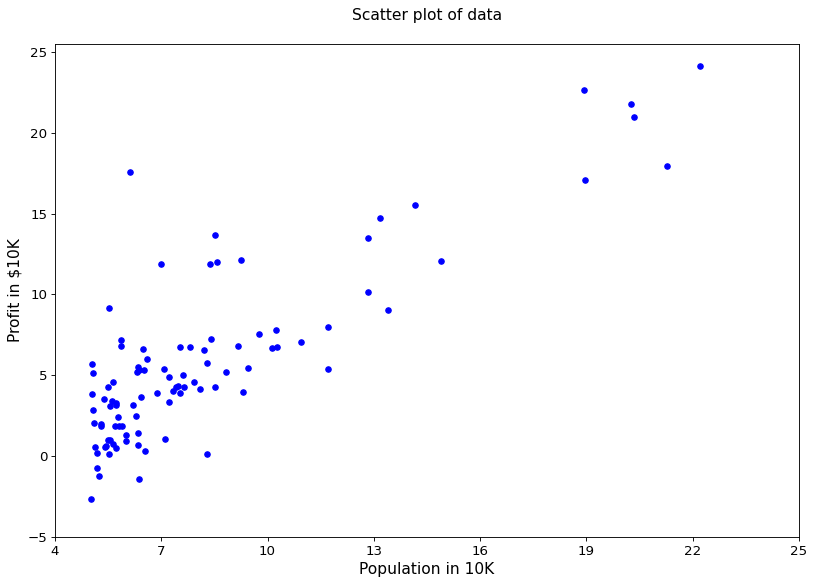

In [52]:
# Visualize the data
fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w')
plt.scatter(df['population'], df['profit'], marker='o', color='blue', s=24)
plt.xlim([4, 25])
plt.xticks(range(4, 26, 3), size=12)
plt.yticks(range(-5, 30, 5), size=12)
plt.xlabel("Population in 10K", size=14)
plt.ylabel("Profit in $10K", size=14)
plt.title("Scatter plot of data\n", size=14)
plt.show()

In [59]:
class LinearRegression(object):
    def __init__(self, X, y, alpha=0.01, n_iterations=250):
        self.X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.y = y
        self.weight = np.zeros((self.X.shape[1], 1))
        self.num_rows = self.X.shape[0]
        self.alpha = alpha
        self.num_iterations = n_iterations
        
    def predict(self, Xtest):
        Xtest = np.hstack((np.ones((Xtest.shape[0], 1)), Xtest))
        return Xtest.dot(self.weight)
    
    def compute_gradient(self, ):
        diff = self.X.dot(self.weight) - self.y
        grad = np.multiply(self.X, diff)
        grad = np.mean(grad, axis=0)
        return grad.reshape(-1, 1)
    
    def gradient_descent(self, ):
        for i in range(self.num_iterations):
            self.weight = self.weight - self.alpha * self.compute_gradient()
            loss = np.mean((self.X.dot(self.weight) - self.y) ** 2)
            if i % 5 == 0:
                print("Iteration: {0} Loss: {1:.5f}\r".format(i + 1, loss))

In [60]:
X = df['population'].values.reshape(-1, 1)
y = df['profit'].values.reshape(-1, 1)
alpha = 0.02
linear_regression = LinearRegression(X, y, alpha)
# linear_regression.gradient_descent()
linear_regression.weight
linear_regression.compute_gradient()

array([[ -5.83913505],
       [-65.32884975]])

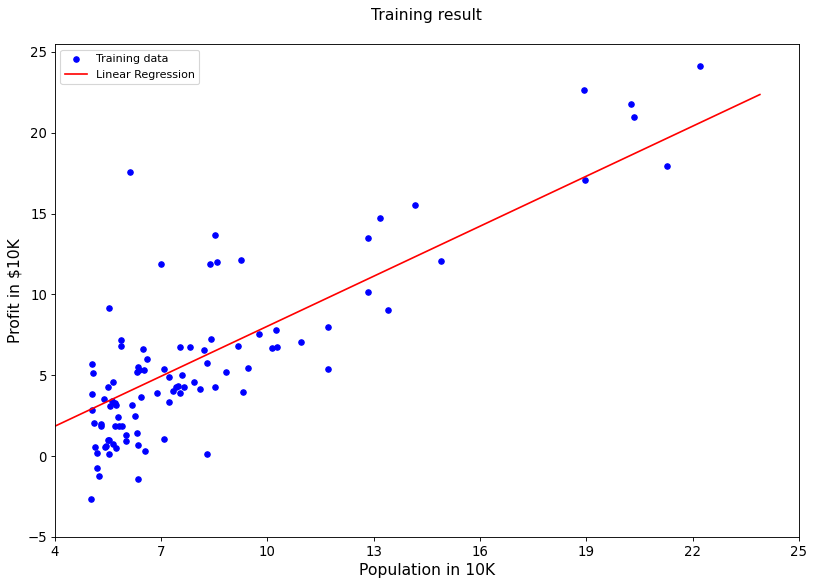

In [42]:
# plot regression line
X = np.arange(4, 24, 0.1).reshape(-1, 1)
fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w')
plt.scatter(df['population'], df['profit'], marker='o', color='blue', s=24, label='Training data')
plt.plot(X, linear_regression.predict(X), color='red', label='Linear Regression')
plt.xlim([4, 25])
plt.xticks(range(4, 26, 3), size=12)
plt.yticks(range(-5, 30, 5), size=12)
plt.xlabel("Population in 10K", size=14)
plt.ylabel("Profit in $10K", size=14)
plt.title("Training result\n", size=14)
plt.legend()
plt.show()

In [62]:
# Linear regression with multiple variables
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("ex1data2.csv", header=None)
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [65]:
X = df.iloc[:, [0, 1]].values
y = df.iloc[:, [2]].values

scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

learner = LinearRegression(X, y, alpha=0.1, n_iterations=500)
learner.gradient_descent()

X_test = np.array([2104, 3]).reshape(1, 2)
X_test = scaler_X.transform(X_test)
prediction = learner.predict(X_test)
print("Prediction (Unscaled): {0:.2f}".format(scaler_y.inverse_transform(prediction)[0][0]))


Iteration: 1 Loss: 0.82818
Iteration: 6 Loss: 0.45032
Iteration: 11 Loss: 0.35190
Iteration: 16 Loss: 0.31528
Iteration: 21 Loss: 0.29673
Iteration: 26 Loss: 0.28578
Iteration: 31 Loss: 0.27896
Iteration: 36 Loss: 0.27464
Iteration: 41 Loss: 0.27189
Iteration: 46 Loss: 0.27014
Iteration: 51 Loss: 0.26902
Iteration: 56 Loss: 0.26831
Iteration: 61 Loss: 0.26785
Iteration: 66 Loss: 0.26756
Iteration: 71 Loss: 0.26738
Iteration: 76 Loss: 0.26726
Iteration: 81 Loss: 0.26719
Iteration: 86 Loss: 0.26714
Iteration: 91 Loss: 0.26711
Iteration: 96 Loss: 0.26709
Iteration: 101 Loss: 0.26708
Iteration: 106 Loss: 0.26707
Iteration: 111 Loss: 0.26706
Iteration: 116 Loss: 0.26706
Iteration: 121 Loss: 0.26706
Iteration: 126 Loss: 0.26706
Iteration: 131 Loss: 0.26706
Iteration: 136 Loss: 0.26706
Iteration: 141 Loss: 0.26706
Iteration: 146 Loss: 0.26706
Iteration: 151 Loss: 0.26706
Iteration: 156 Loss: 0.26706
Iteration: 161 Loss: 0.26706
Iteration: 166 Loss: 0.26706
Iteration: 171 Loss: 0.26706
Iterati